In [1]:
# import everything needed
import ROOT
import time
import numpy as np
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import uproot
import matplotlib.pyplot as plt
import mplhep as hep

# configure ROOT's behavior
ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat("nemruoi")
ROOT.gROOT.ForceStyle()

Welcome to JupyROOT 6.26/07


/cvmfs/cms.cern.ch/el9_amd64_gcc11/external/py3-numpy/1.22.4-1e1240160543ee39175a125e9a5e9cae/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc11/external/py3-numpy/1.22.4-1e1240160543ee39175a125e9a5e9cae/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/cms.cern.ch/el9_amd64_gcc11/external/py3-numpy/1.22.4-1e1240160543ee39175a125e9a5e9cae/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/el9_amd64_gcc11/external/py3-numpy/1.22.4-1e1240160543ee39175a125e9a5e9cae/lib/python3.9/site-pac

--- 3.5088953971862793 seconds ---


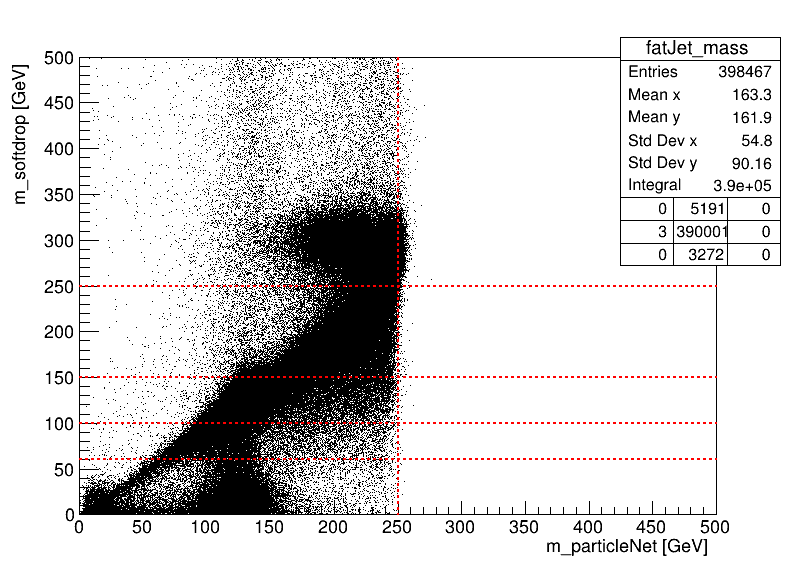

In [2]:
nBins = 2000
mass_min = 0.
mass_max = 500. 


# start timer
start_time = time.time()

events = NanoEventsFactory.from_root("/STORE/matej/H3_skims/2017/XToYHTo6B_MX-4000_MY-300/1C0AE519-F164-C149-B3EA-4B48017F9D08.root",schemaclass=NanoAODSchema,metadata={"dataset":""},entry_stop=None).events()
fatjets = events.FatJet
fatJet_mass_sd = ak.flatten(fatjets[:,0:2].msoftdrop)
fatJet_mass_pn = ak.flatten(fatjets[:,0:2].particleNet_mass)


fatJet_mass_sd_bin = hist.axis.Regular(label="m_softdrop [GeV]", name="fatJet_mass_sd", bins=nBins, start=mass_min, stop=mass_max)
fatJet_mass_pn_bin = hist.axis.Regular(label="m_particleNet [GeV]", name="fatJet_mass_pn", bins=nBins, start=mass_min, stop=mass_max)
fatJet_mass_hist = hist.Hist(fatJet_mass_pn_bin, fatJet_mass_sd_bin, storage="weight")
fatJet_mass_hist.fill(fatJet_mass_sd = fatJet_mass_sd, fatJet_mass_pn = fatJet_mass_pn)


# stop timer
print("--- {} seconds ---".format(time.time() - start_time))


with uproot.recreate("outfile.root") as fout:
    fout["fatJet_mass"] = fatJet_mass_hist

c=ROOT.TCanvas("c","The Canvas Title",800,600)
fout = ROOT.TFile.Open("outfile.root", "READ")
h = fout.Get("fatJet_mass")
h.Draw("hist")


line1 = ROOT.TLine(250, 0, 250, 500)
line2 = ROOT.TLine(0, 100, 500, 100)
line3 = ROOT.TLine(0, 150, 500, 150)
line4 = ROOT.TLine(0, 250, 500, 250)
line5 = ROOT.TLine(0, 60, 500, 60)

line1.SetLineColor(ROOT.kRed)
line1.SetLineWidth(2)
line1.SetLineStyle(2)

line2.SetLineColor(ROOT.kRed)
line2.SetLineWidth(2)
line2.SetLineStyle(2)

line3.SetLineColor(ROOT.kRed)
line3.SetLineWidth(2)
line3.SetLineStyle(2)

line4.SetLineColor(ROOT.kRed)
line4.SetLineWidth(2)
line4.SetLineStyle(2)

line5.SetLineColor(ROOT.kRed)
line5.SetLineWidth(2)
line5.SetLineStyle(2)

line1.Draw()
line2.Draw()
line3.Draw()
line4.Draw()
line5.Draw()



c.Update()
c.Draw()

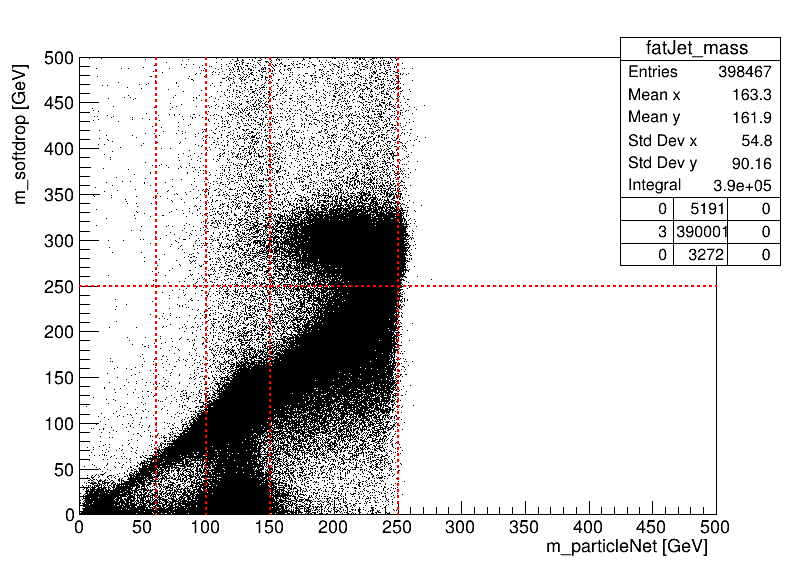

In [3]:
fout = ROOT.TFile.Open("outfile.root", "READ")
h = fout.Get("fatJet_mass")
h.Draw("hist")


line1 = ROOT.TLine(250, 0, 250, 500)
line2 = ROOT.TLine(100, 0, 100, 500)
line3 = ROOT.TLine(150, 0, 150, 500)
line4 = ROOT.TLine(250, 0, 250, 500)
line5 = ROOT.TLine(60, 0, 60, 500)
line6 = ROOT.TLine(0, 250, 500, 250)

line1.SetLineColor(ROOT.kRed)
line1.SetLineWidth(2)
line1.SetLineStyle(2)

line2.SetLineColor(ROOT.kRed)
line2.SetLineWidth(2)
line2.SetLineStyle(2)

line3.SetLineColor(ROOT.kRed)
line3.SetLineWidth(2)
line3.SetLineStyle(2)

line4.SetLineColor(ROOT.kRed)
line4.SetLineWidth(2)
line4.SetLineStyle(2)

line5.SetLineColor(ROOT.kRed)
line5.SetLineWidth(2)
line5.SetLineStyle(2)

line6.SetLineColor(ROOT.kRed)
line6.SetLineWidth(2)
line6.SetLineStyle(2)


line1.Draw()
line2.Draw()
line3.Draw()
line4.Draw()
line5.Draw()
line6.Draw()



c.Update()
c.Draw()